## Notbook overview
### This notebook features an analysis of the dataset provided by the Hospital Israelita Albert Einstein. The dataset contains anonymized data from patients seen at the Hospital Israelita Albert Einstein, at São Paulo, Brazil, and who had samples collected to perform the SARS-CoV-2 RT-PCR and additional laboratory tests during a visit to the hospital.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('dataset.xlsx')

In [3]:
data.shape

(5644, 111)

In [4]:
data.describe

<bound method NDFrame.describe of            Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                    13               negative   
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
...               ...                   ...                    ...   
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1            

In [5]:
data.tail()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5643,2697fdccbfeb7f7,19,positive,0,0,0,0.694287,0.541564,-0.906829,-0.325903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.columns = [x.lower().strip().replace(',','').replace(' ','_') for x in data.columns]
data.columns

Index(['patient_id', 'patient_age_quantile', 'sars-cov-2_exam_result',
       'patient_addmited_to_regular_ward_(1=yes_0=no)',
       'patient_addmited_to_semi-intensive_unit_(1=yes_0=no)',
       'patient_addmited_to_intensive_care_unit_(1=yes_0=no)', 'hematocrit',
       'hemoglobin', 'platelets', 'mean_platelet_volume',
       ...
       'hb_saturation_(arterial_blood_gases)',
       'pco2_(arterial_blood_gas_analysis)',
       'base_excess_(arterial_blood_gas_analysis)',
       'ph_(arterial_blood_gas_analysis)',
       'total_co2_(arterial_blood_gas_analysis)',
       'hco3_(arterial_blood_gas_analysis)',
       'po2_(arterial_blood_gas_analysis)', 'arteiral_fio2', 'phosphor',
       'cto2_(arterial_blood_gas_analysis)'],
      dtype='object', length=111)

In [7]:
data.isnull().sum()

patient_id                                                 0
patient_age_quantile                                       0
sars-cov-2_exam_result                                     0
patient_addmited_to_regular_ward_(1=yes_0=no)              0
patient_addmited_to_semi-intensive_unit_(1=yes_0=no)       0
                                                        ... 
hco3_(arterial_blood_gas_analysis)                      5617
po2_(arterial_blood_gas_analysis)                       5617
arteiral_fio2                                           5624
phosphor                                                5624
cto2_(arterial_blood_gas_analysis)                      5617
Length: 111, dtype: int64

## % of missing values for each column

In [8]:
total_cells = np.product(data.shape)
total_missing = data.isnull().sum()


percentage_missing = (total_missing/total_cells)*100
percentage_missing

patient_id                                              0.000000
patient_age_quantile                                    0.000000
sars-cov-2_exam_result                                  0.000000
patient_addmited_to_regular_ward_(1=yes_0=no)           0.000000
patient_addmited_to_semi-intensive_unit_(1=yes_0=no)    0.000000
                                                          ...   
hco3_(arterial_blood_gas_analysis)                      0.896591
po2_(arterial_blood_gas_analysis)                       0.896591
arteiral_fio2                                           0.897708
phosphor                                                0.897708
cto2_(arterial_blood_gas_analysis)                      0.896591
Length: 111, dtype: float64

## Total % of missing values

In [9]:
missing_values_count = data.isnull().sum()
total_missing = missing_values_count.sum()

# total of % data missing
(total_missing/total_cells)*100

88.06003026414082

## Sorting by missing values (%)

In [10]:
#50 is just a random value
percentage_missing.sort_values(ascending=True).head(50)

patient_id                                              0.000000
patient_age_quantile                                    0.000000
sars-cov-2_exam_result                                  0.000000
patient_addmited_to_regular_ward_(1=yes_0=no)           0.000000
patient_addmited_to_semi-intensive_unit_(1=yes_0=no)    0.000000
patient_addmited_to_intensive_care_unit_(1=yes_0=no)    0.000000
influenza_b                                             0.684774
respiratory_syncytial_virus                             0.684774
influenza_a                                             0.684774
rhinovirus/enterovirus                                  0.685093
inf_a_h1n1_2009                                         0.685093
coronavirusoc43                                         0.685093
coronavirus229e                                         0.685093
parainfluenza_4                                         0.685093
adenovirus                                              0.685093
chlamydophila_pneumoniae 

## Checking the features correation

In [11]:
correlations = data.corr(method='pearson')
correlations

,patient_age_quantile,patient_addmited_to_regular_ward_(1=yes_0=no),patient_addmited_to_semi-intensive_unit_(1=yes_0=no),patient_addmited_to_intensive_care_unit_(1=yes_0=no),hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,...,hb_saturation_(arterial_blood_gases),pco2_(arterial_blood_gas_analysis),base_excess_(arterial_blood_gas_analysis),ph_(arterial_blood_gas_analysis),total_co2_(arterial_blood_gas_analysis),hco3_(arterial_blood_gas_analysis),po2_(arterial_blood_gas_analysis),arteiral_fio2,phosphor,cto2_(arterial_blood_gas_analysis)
patient_age_quantile,1.000000,0.046166,0.015736,-0.035772,0.096808,0.060320,-0.158683,0.119449,-0.037510,-0.125935,...,-0.223949,-0.469049,0.570445,0.570755,0.086133,0.166245,-0.098422,-0.334562,-0.511705,-0.061265
patient_addmited_to_regular_ward_(1=yes_0=no),0.046166,1.000000,-0.011264,-0.010192,-0.087241,-0.091867,-0.183091,-0.013134,-0.053143,-0.095313,...,0.198186,-0.226778,0.033456,0.203640,-0.159803,-0.133434,0.105608,-0.173663,NaN,0.273102
patient_addmited_to_semi-intensive_unit_(1=yes_0=no),0.015736,-0.011264,1.000000,-0.008087,-0.182215,-0.177142,0.006966,-0.023475,-0.137951,-0.110574,...,-0.559117,0.113153,-0.226234,-0.178971,-0.112624,-0.136503,-0.338690,-0.091269,0.185231,-0.049042
patient_addmited_to_intensive_care_unit_(1=yes_0=no),-0.035772,-0.010192,-0.008087,1.000000,-0.183850,-0.178878,0.125953,-0.073511,-0.120659,-0.109867,...,0.351994,0.298040,0.203506,-0.179731,0.424729,0.410957,0.155628,0.348072,0.129927,-0.383220
hematocrit,0.096808,-0.087241,-0.182215,-0.183850,1.000000,0.968447,-0.082296,0.083580,0.872987,0.002035,...,-0.046283,-0.180164,-0.195979,0.063842,-0.343724,-0.340215,0.124125,0.066204,0.172490,0.878029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hco3_(arterial_blood_gas_analysis),0.166245,-0.133434,-0.136503,0.410957,-0.340215,-0.420707,0.133917,0.266651,-0.267605,0.012786,...,-0.348558,0.513884,0.644222,-0.209320,0.992877,1.000000,-0.302613,0.104921,-1.000000,-0.434762
po2_(arterial_blood_gas_analysis),-0.098422,0.105608,-0.338690,0.155628,0.124125,0.081471,-0.138133,-0.226406,0.200226,0.057973,...,0.796438,-0.296518,-0.093285,0.200313,-0.314796,-0.302613,1.000000,-0.194277,-1.000000,0.270951
arteiral_fio2,-0.334562,-0.173663,-0.091269,0.348072,0.066204,-0.003308,0.471555,0.079731,-0.257630,0.226611,...,-0.018400,0.400575,-0.262126,-0.387237,0.168055,0.104921,-0.194277,1.000000,1.000000,-0.212128
phosphor,-0.511705,NaN,0.185231,0.129927,0.172490,0.259642,0.125356,-0.221918,0.189551,0.109370,...,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000


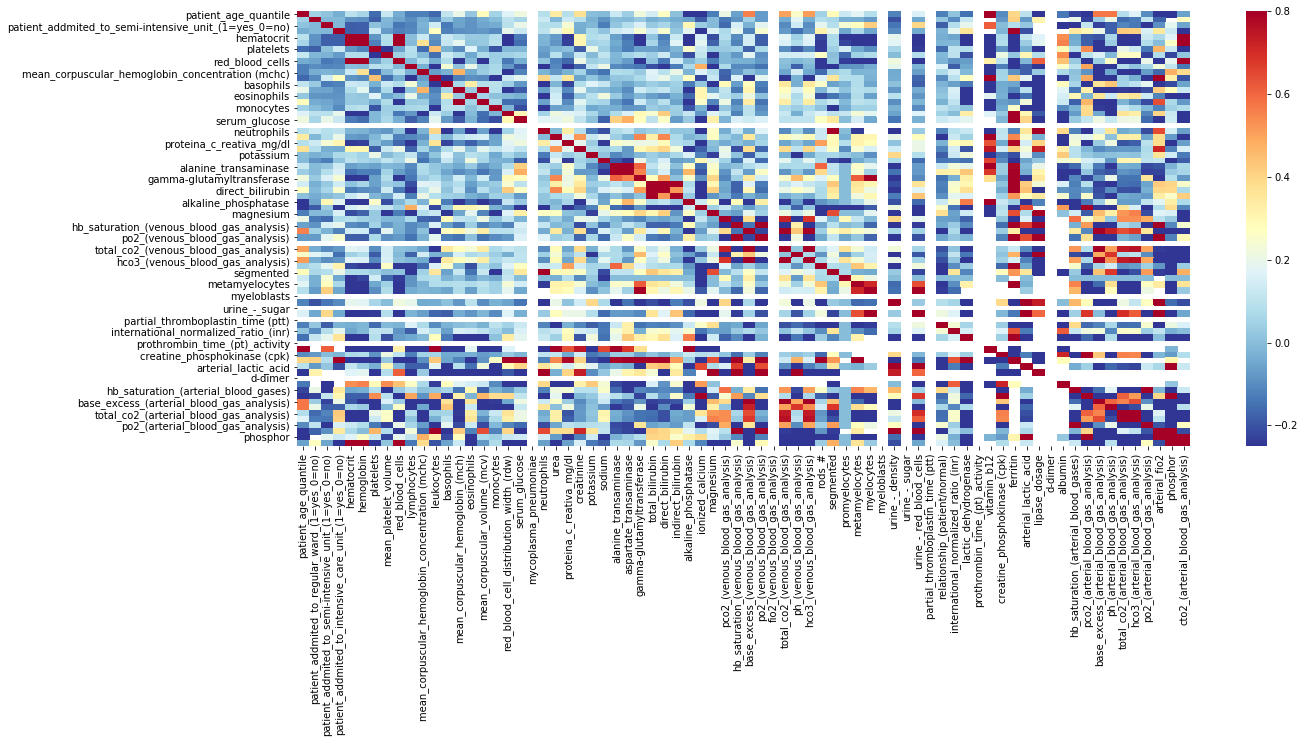

In [12]:
plt.figure(figsize = (20, 8))
sns.heatmap(correlations, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = False, vmax = 0.8)

## Finding the category values

In [13]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['patient_id',
 'sars-cov-2_exam_result',
 'respiratory_syncytial_virus',
 'influenza_a',
 'influenza_b',
 'parainfluenza_1',
 'coronavirusnl63',
 'rhinovirus/enterovirus',
 'coronavirus_hku1',
 'parainfluenza_3',
 'chlamydophila_pneumoniae',
 'adenovirus',
 'parainfluenza_4',
 'coronavirus229e',
 'coronavirusoc43',
 'inf_a_h1n1_2009',
 'bordetella_pertussis',
 'metapneumovirus',
 'parainfluenza_2',
 'influenza_b_rapid_test',
 'influenza_a_rapid_test',
 'strepto_a',
 'urine_-_esterase',
 'urine_-_aspect',
 'urine_-_ph',
 'urine_-_hemoglobin',
 'urine_-_bile_pigments',
 'urine_-_ketone_bodies',
 'urine_-_nitrite',
 'urine_-_urobilinogen',
 'urine_-_protein',
 'urine_-_leukocytes',
 'urine_-_crystals',
 'urine_-_hyaline_cylinders',
 'urine_-_granular_cylinders',
 'urine_-_yeasts',
 'urine_-_color']

## Encoding the category values

In [14]:
for col in object_cols:
    data[col] = data[col].astype('category')
    data[col] = data[col].cat.codes

In [15]:
data.tail()

,patient_id,patient_age_quantile,sars-cov-2_exam_result,patient_addmited_to_regular_ward_(1=yes_0=no),patient_addmited_to_semi-intensive_unit_(1=yes_0=no),patient_addmited_to_intensive_care_unit_(1=yes_0=no),hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_(arterial_blood_gases),pco2_(arterial_blood_gas_analysis),base_excess_(arterial_blood_gas_analysis),ph_(arterial_blood_gas_analysis),total_co2_(arterial_blood_gas_analysis),hco3_(arterial_blood_gas_analysis),po2_(arterial_blood_gas_analysis),arteiral_fio2,phosphor,cto2_(arterial_blood_gas_analysis)
5639,3892,3,1,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,1860,17,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,2125,4,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,4316,10,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5643,918,19,1,0,0,0,0.694287,0.541564,-0.906829,-0.325903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking the features correlation after the encodding

In [16]:
correlations = data.corr(method='pearson')
correlations

,patient_id,patient_age_quantile,sars-cov-2_exam_result,patient_addmited_to_regular_ward_(1=yes_0=no),patient_addmited_to_semi-intensive_unit_(1=yes_0=no),patient_addmited_to_intensive_care_unit_(1=yes_0=no),hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_(arterial_blood_gases),pco2_(arterial_blood_gas_analysis),base_excess_(arterial_blood_gas_analysis),ph_(arterial_blood_gas_analysis),total_co2_(arterial_blood_gas_analysis),hco3_(arterial_blood_gas_analysis),po2_(arterial_blood_gas_analysis),arteiral_fio2,phosphor,cto2_(arterial_blood_gas_analysis)
patient_id,1.000000,-0.014136,-0.018664,0.003748,-0.004803,0.000162,-0.061132,-0.044793,0.021162,0.026375,...,-0.155937,0.156595,-0.038165,-0.140723,0.071734,0.058007,-0.074043,0.345427,0.086129,-0.040813
patient_age_quantile,-0.014136,1.000000,0.075244,0.046166,0.015736,-0.035772,0.096808,0.060320,-0.158683,0.119449,...,-0.223949,-0.469049,0.570445,0.570755,0.086133,0.166245,-0.098422,-0.334562,-0.511705,-0.061265
sars-cov-2_exam_result,-0.018664,0.075244,1.000000,0.142437,0.019364,0.027586,0.099120,0.104775,-0.282268,0.108836,...,0.131187,-0.323977,0.130511,0.314820,-0.249422,-0.213858,0.312537,-0.310583,-0.122276,0.267457
patient_addmited_to_regular_ward_(1=yes_0=no),0.003748,0.046166,0.142437,1.000000,-0.011264,-0.010192,-0.087241,-0.091867,-0.183091,-0.013134,...,0.198186,-0.226778,0.033456,0.203640,-0.159803,-0.133434,0.105608,-0.173663,NaN,0.273102
patient_addmited_to_semi-intensive_unit_(1=yes_0=no),-0.004803,0.015736,0.019364,-0.011264,1.000000,-0.008087,-0.182215,-0.177142,0.006966,-0.023475,...,-0.559117,0.113153,-0.226234,-0.178971,-0.112624,-0.136503,-0.338690,-0.091269,0.185231,-0.049042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hco3_(arterial_blood_gas_analysis),0.058007,0.166245,-0.213858,-0.133434,-0.136503,0.410957,-0.340215,-0.420707,0.133917,0.266651,...,-0.348558,0.513884,0.644222,-0.209320,0.992877,1.000000,-0.302613,0.104921,-1.000000,-0.434762
po2_(arterial_blood_gas_analysis),-0.074043,-0.098422,0.312537,0.105608,-0.338690,0.155628,0.124125,0.081471,-0.138133,-0.226406,...,0.796438,-0.296518,-0.093285,0.200313,-0.314796,-0.302613,1.000000,-0.194277,-1.000000,0.270951
arteiral_fio2,0.345427,-0.334562,-0.310583,-0.173663,-0.091269,0.348072,0.066204,-0.003308,0.471555,0.079731,...,-0.018400,0.400575,-0.262126,-0.387237,0.168055,0.104921,-0.194277,1.000000,1.000000,-0.212128
phosphor,0.086129,-0.511705,-0.122276,NaN,0.185231,0.129927,0.172490,0.259642,0.125356,-0.221918,...,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000


## Checking the correlation between the features and the target (exam result)

In [17]:
cor_target = abs(correlations['sars-cov-2_exam_result'])
cor_target.sort_values(ascending=False).head(50)

sars-cov-2_exam_result                           1.000000
pco2_(arterial_blood_gas_analysis)               0.323977
ph_(arterial_blood_gas_analysis)                 0.314820
po2_(arterial_blood_gas_analysis)                0.312537
arteiral_fio2                                    0.310583
ionized_calcium                                  0.305113
leukocytes                                       0.288508
platelets                                        0.282268
cto2_(arterial_blood_gas_analysis)               0.267457
total_co2_(arterial_blood_gas_analysis)          0.249422
hco3_(arterial_blood_gas_analysis)               0.213858
monocytes                                        0.197333
eosinophils                                      0.192609
lipase_dosage                                    0.191942
segmented                                        0.186514
ferritin                                         0.180874
urine_-_density                                  0.180874
aspartate_tran

## We fill the Nan values with the features median

In [20]:
data = data.fillna(data.median())

In [21]:
data.tail()

,patient_id,patient_age_quantile,sars-cov-2_exam_result,patient_addmited_to_regular_ward_(1=yes_0=no),patient_addmited_to_semi-intensive_unit_(1=yes_0=no),patient_addmited_to_intensive_care_unit_(1=yes_0=no),hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_(arterial_blood_gases),pco2_(arterial_blood_gas_analysis),base_excess_(arterial_blood_gas_analysis),ph_(arterial_blood_gas_analysis),total_co2_(arterial_blood_gas_analysis),hco3_(arterial_blood_gas_analysis),po2_(arterial_blood_gas_analysis),arteiral_fio2,phosphor,cto2_(arterial_blood_gas_analysis)
5639,3892,3,1,0,0,0,0.053407,0.040316,-0.121716,-0.101517,...,0.267769,-0.21208,-0.011817,0.294202,0.077435,0.056332,-0.159955,-0.011744,-0.138182,0.182693
5640,1860,17,0,0,0,0,0.053407,0.040316,-0.121716,-0.101517,...,0.267769,-0.21208,-0.011817,0.294202,0.077435,0.056332,-0.159955,-0.011744,-0.138182,0.182693
5641,2125,4,0,0,0,0,0.053407,0.040316,-0.121716,-0.101517,...,0.267769,-0.21208,-0.011817,0.294202,0.077435,0.056332,-0.159955,-0.011744,-0.138182,0.182693
5642,4316,10,0,0,0,0,0.053407,0.040316,-0.121716,-0.101517,...,0.267769,-0.21208,-0.011817,0.294202,0.077435,0.056332,-0.159955,-0.011744,-0.138182,0.182693
5643,918,19,1,0,0,0,0.694287,0.541564,-0.906829,-0.325903,...,0.267769,-0.21208,-0.011817,0.294202,0.077435,0.056332,-0.159955,-0.011744,-0.138182,0.182693


## First, let's try those features that had less missing values

In [22]:
#22 features. Just a random number
data_model = data[['sars-cov-2_exam_result', 'patient_age_quantile', 'patient_addmited_to_regular_ward_(1=yes_0=no)', 'patient_addmited_to_semi-intensive_unit_(1=yes_0=no)', 'patient_addmited_to_intensive_care_unit_(1=yes_0=no)', 'influenza_b', 'respiratory_syncytial_virus', 'influenza_a', 'rhinovirus/enterovirus', 'inf_a_h1n1_2009', 'coronavirusoc43', 'coronavirus229e', 'parainfluenza_4', 'adenovirus', 'chlamydophila_pneumoniae', 'parainfluenza_3', 'coronavirus_hku1', 'coronavirusnl63', 'parainfluenza_1', 'bordetella_pertussis', 'parainfluenza_2', 'metapneumovirus']]
data_model.isnull().sum()

sars-cov-2_exam_result                                  0
patient_age_quantile                                    0
patient_addmited_to_regular_ward_(1=yes_0=no)           0
patient_addmited_to_semi-intensive_unit_(1=yes_0=no)    0
patient_addmited_to_intensive_care_unit_(1=yes_0=no)    0
influenza_b                                             0
respiratory_syncytial_virus                             0
influenza_a                                             0
rhinovirus/enterovirus                                  0
inf_a_h1n1_2009                                         0
coronavirusoc43                                         0
coronavirus229e                                         0
parainfluenza_4                                         0
adenovirus                                              0
chlamydophila_pneumoniae                                0
parainfluenza_3                                         0
coronavirus_hku1                                        0
coronavirusnl6

In [23]:
data_model.shape

(5644, 22)

## The data is highly imbalanced

In [24]:
data_model['sars-cov-2_exam_result'].value_counts()

0    5086
1     558
Name: sars-cov-2_exam_result, dtype: int64

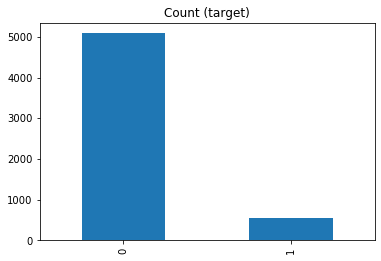

In [25]:
data_model['sars-cov-2_exam_result'].value_counts().plot(kind='bar', title='Count (target)')

## Under-sampling. Based on: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [26]:
# Class count
count_class_0, count_class_1 = data_model['sars-cov-2_exam_result'].value_counts()

# Divide by class
class_0 = data_model[data_model['sars-cov-2_exam_result'] == 0]
class_1 = data_model[data_model['sars-cov-2_exam_result'] == 1]

Under-sampling:
1    558
0    558
Name: sars-cov-2_exam_result, dtype: int64


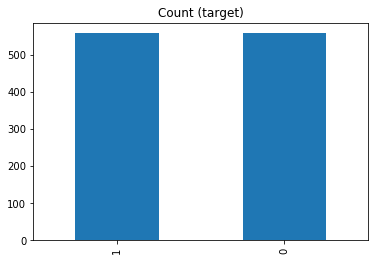

In [27]:
class_0_under = class_0.sample(count_class_1)
new_data_under = pd.concat([class_0_under, class_1], axis=0)

print('Under-sampling:')
print(new_data_under['sars-cov-2_exam_result'].value_counts())

new_data_under['sars-cov-2_exam_result'].value_counts().plot(kind='bar', title='Count (target)')

In [28]:
data_model = new_data_under
data_model['sars-cov-2_exam_result'].value_counts()

1    558
0    558
Name: sars-cov-2_exam_result, dtype: int64

## Defining X and y

In [29]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
X = data_model.drop(['sars-cov-2_exam_result'], axis=1)
y = data_model['sars-cov-2_exam_result'].copy()

In [30]:
X.shape

(1116, 21)

In [31]:
y.shape

(1116,)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [33]:
X_train.shape

(892, 21)

In [34]:
X_test.shape

(224, 21)

## We are going to use 4 different classifiers:
* Logistic Regression
* KNN
* SVM
* Naive Bayes

### We create a dictionary to save the classifiers results

In [35]:
results_dict = {}

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
kf = KFold(n_splits=10, random_state=0, shuffle=True)

In [37]:
lr = LogisticRegression(C=0.5, random_state=1)
mean_auc_lr = cross_val_score(lr, X_train, y_train, n_jobs=-1, cv=kf, scoring='roc_auc').mean()
results_dict['Logistic Regression'] = mean_auc_lr
results_dict

{'Logistic Regression': 0.6302331273818569}

In [38]:
knn = KNeighborsClassifier(n_neighbors=5)
mean_auc_knn = cross_val_score(knn, X_train, y_train, n_jobs=-1, cv=kf, scoring='roc_auc').mean()
results_dict['KNN'] = mean_auc_knn
results_dict

{'Logistic Regression': 0.6302331273818569, 'KNN': 0.6206489755088305}

In [39]:
svm = svm.SVC()
mean_auc_svm = cross_val_score(svm, X_train, y_train, n_jobs=-1, cv=kf, scoring='roc_auc').mean()
results_dict['SVM'] = mean_auc_svm
results_dict

{'Logistic Regression': 0.6302331273818569,
 'KNN': 0.6206489755088305,
 'SVM': 0.6231064272596177}

In [40]:
nb = GaussianNB()
mean_auc_nb = cross_val_score(nb, X_train, y_train, n_jobs=-1, cv=kf, scoring='roc_auc').mean()
results_dict['NB'] = mean_auc_nb
results_dict

{'Logistic Regression': 0.6302331273818569,
 'KNN': 0.6206489755088305,
 'SVM': 0.6231064272596177,
 'NB': 0.6278260971599372}

<BarContainer object of 4 artists>

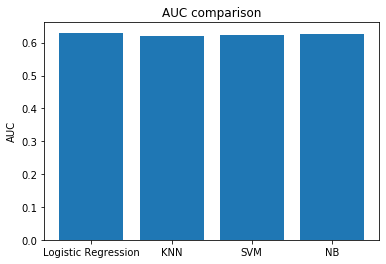

In [41]:
x = ['Logistic Regression', 'KNN', 'SVM', 'NB']
y = [results_dict['Logistic Regression'], results_dict['KNN'], results_dict['SVM'], results_dict['NB']]
plt.title("AUC comparison")
plt.ylabel("AUC")
plt.bar(x,y)

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error
lr.fit(X_train, y_train)
predicted = lr.predict(X_test)
roc_auc = roc_auc_score(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)

print("Mean Absolute Error: {} | ROC AUC: {}".format(mae, roc_auc))

Mean Absolute Error: 0.48214285714285715 | ROC AUC: 0.5222257755036777


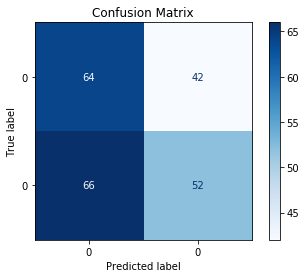

In [43]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(lr, X_test, y_test,
                                 display_labels=data_model['sars-cov-2_exam_result'],
                                 cmap=plt.cm.Blues)

disp.ax_.set_title("Confusion Matrix")
disp.confusion_matrix
plt.show()

In [44]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, predicted)
confusion

array([[64, 42],
       [66, 52]], dtype=int64)

## In the medical domain, two measures are widely used: **Sensitivity** and **Specificity**. To calculate them we need:
* True Positive (TP)
* True Negative (TN)
* False Positive (FP)
* Flase Negative (FN)
* Sensitivity = TP/(TP+FN)
* Specificity = TN/(TN+FP)

In [45]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [46]:
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

"Sensitivity: {} | Specifictity: {}".format(sensitivity, specificity)

'Sensitivity: 0.4406779661016949 | Specifictity: 0.6037735849056604'

## Let's test a new set of features. These are the most correlated with the target (sars-cov-2_exam_result), as seen previously

In [47]:
#17 features. Just a random number
new_data_model = data[['sars-cov-2_exam_result', 'pco2_(arterial_blood_gas_analysis)', 'ph_(arterial_blood_gas_analysis)', 'po2_(arterial_blood_gas_analysis)', 'arteiral_fio2', 'ionized_calcium', 'leukocytes', 'platelets', 'cto2_(arterial_blood_gas_analysis)', 'total_co2_(arterial_blood_gas_analysis)', 'hco3_(arterial_blood_gas_analysis)', 'monocytes', 'eosinophils', 'lipase_dosage', 'segmented', 'ferritin', 'urine_-_density']]

In [48]:
new_data_model.shape

(5644, 17)

### The correlation between the new features

In [49]:
correlations = new_data_model.corr(method='pearson')
correlations

,sars-cov-2_exam_result,pco2_(arterial_blood_gas_analysis),ph_(arterial_blood_gas_analysis),po2_(arterial_blood_gas_analysis),arteiral_fio2,ionized_calcium,leukocytes,platelets,cto2_(arterial_blood_gas_analysis),total_co2_(arterial_blood_gas_analysis),hco3_(arterial_blood_gas_analysis),monocytes,eosinophils,lipase_dosage,segmented,ferritin,urine_-_density
sars-cov-2_exam_result,1.000000,-0.018302,0.009947,0.049739,-0.029991,-0.031608,-0.097790,-0.100623,0.014530,-0.035638,-0.029709,0.078906,-0.055927,0.022588,0.023877,0.009403,-0.023917
pco2_(arterial_blood_gas_analysis),-0.018302,1.000000,-0.940475,-0.253855,0.376529,0.349770,0.134629,0.089442,-0.288295,0.580050,0.490349,0.086700,-0.007935,-0.000179,-0.156379,-0.010594,0.006851
ph_(arterial_blood_gas_analysis),0.009947,-0.940475,1.000000,0.145427,-0.364715,-0.372894,-0.156201,-0.081895,0.136428,-0.285971,-0.184731,-0.091070,0.029104,0.000243,0.158118,0.015608,-0.001693
po2_(arterial_blood_gas_analysis),0.049739,-0.253855,0.145427,1.000000,-0.177077,-0.114232,-0.047660,-0.031953,0.234976,-0.322077,-0.307203,-0.000303,0.022290,-0.000136,0.043174,0.031009,-0.024268
arteiral_fio2,-0.029991,0.376529,-0.364715,-0.177077,1.000000,0.041060,0.175208,0.081001,-0.195135,0.134306,0.083208,-0.025347,-0.021061,-0.000009,-0.065697,-0.000015,0.062641
ionized_calcium,-0.031608,0.349770,-0.372894,-0.114232,0.041060,1.000000,-0.107254,0.056527,-0.048440,0.087386,0.043512,-0.005060,0.126251,0.010607,-0.137827,-0.315236,0.036575
leukocytes,-0.097790,0.134629,-0.156201,-0.047660,0.175208,-0.107254,1.000000,0.454049,-0.064177,0.003041,-0.012799,-0.265798,-0.027515,-0.041646,0.156297,0.083635,-0.011285
platelets,-0.100623,0.089442,-0.081895,-0.031953,0.081001,0.056527,0.454049,1.000000,-0.080885,0.040357,0.027205,-0.185792,0.194729,-0.042101,-0.004716,-0.092582,0.015255
cto2_(arterial_blood_gas_analysis),0.014530,-0.288295,0.136428,0.234976,-0.195135,-0.048440,-0.064177,-0.080885,1.000000,-0.419852,-0.416982,0.015115,-0.077647,0.000155,0.060525,-0.037192,-0.020683
total_co2_(arterial_blood_gas_analysis),-0.035638,0.580050,-0.285971,-0.322077,0.134306,0.087386,0.003041,0.040357,-0.419852,1.000000,0.992689,0.027318,0.064652,0.000067,-0.047647,-0.002045,0.016831


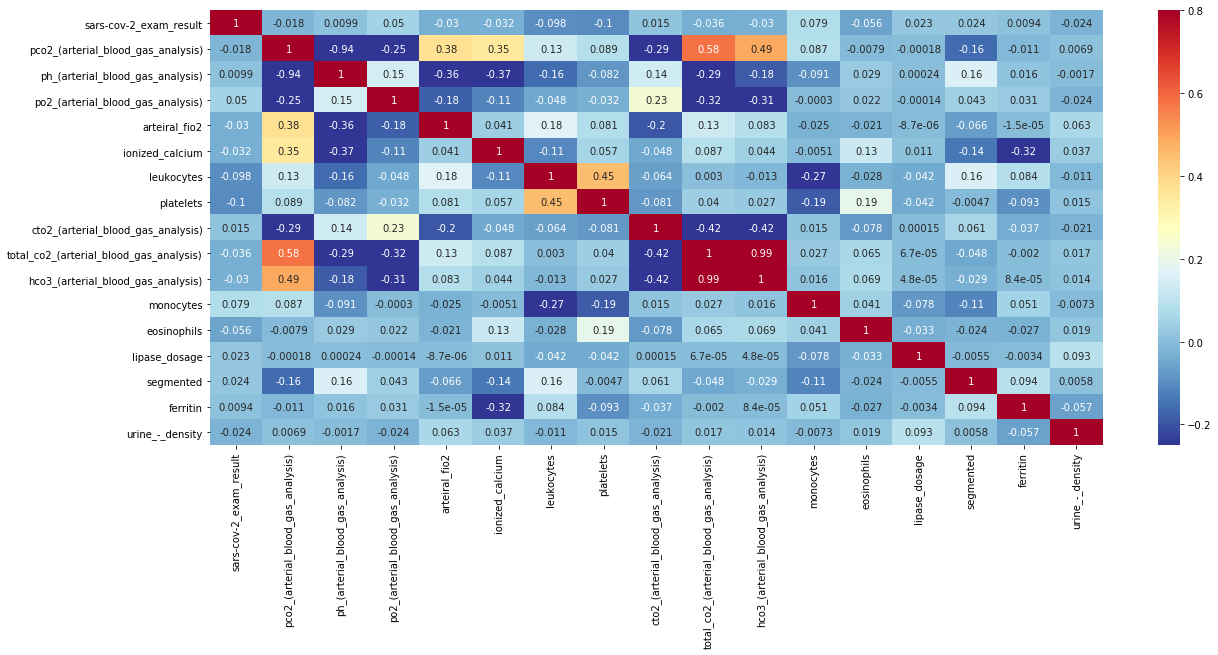

In [50]:
plt.figure(figsize = (20, 8))
sns.heatmap(correlations, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.8)

In [51]:
X = new_data_model.drop(['sars-cov-2_exam_result'], axis=1)
y = new_data_model['sars-cov-2_exam_result'].copy()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [53]:
new_result_dict = {}

In [54]:
mean_auc_lr = cross_val_score(lr, X_train, y_train, n_jobs=-1, cv=kf, scoring='roc_auc').mean()
new_result_dict['Logistic Regression'] = mean_auc_lr
new_result_dict

{'Logistic Regression': 0.5698484240792644}

In [55]:
mean_auc_knn = cross_val_score(knn, X_train, y_train, n_jobs=-1, cv=kf, scoring='roc_auc').mean()
new_result_dict['KNN'] = mean_auc_knn
new_result_dict

{'Logistic Regression': 0.5698484240792644, 'KNN': 0.5376914071473463}

In [56]:
mean_auc_svm = cross_val_score(svm, X_train, y_train, n_jobs=-1, cv=kf, scoring='roc_auc').mean()
new_result_dict['SVM'] = mean_auc_svm
new_result_dict

{'Logistic Regression': 0.5698484240792644,
 'KNN': 0.5376914071473463,
 'SVM': 0.5459721877211607}

In [57]:
mean_auc_nb = cross_val_score(nb, X_train, y_train, n_jobs=-1, cv=kf, scoring='roc_auc').mean()
new_result_dict['NB'] = mean_auc_nb
new_result_dict

{'Logistic Regression': 0.5698484240792644,
 'KNN': 0.5376914071473463,
 'SVM': 0.5459721877211607,
 'NB': 0.5376040405885218}

<BarContainer object of 4 artists>

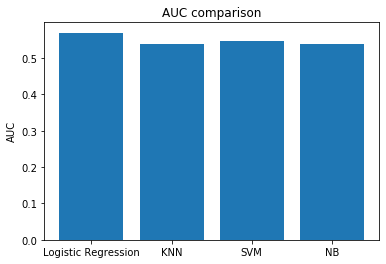

In [58]:
x = ['Logistic Regression', 'KNN', 'SVM', 'NB']
y = [new_result_dict['Logistic Regression'], new_result_dict['KNN'], new_result_dict['SVM'], new_result_dict['NB']]
plt.title("AUC comparison")
plt.ylabel("AUC")
plt.bar(x,y)

In [60]:
lr.fit(X_train, y_train)
predicted = lr.predict(X_test)
roc_auc = roc_auc_score(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)

print("Mean Absolute Error: {} | ROC AUC: {}".format(mae, roc_auc))

Mean Absolute Error: 0.10983170947741364 | ROC AUC: 0.5079365079365079


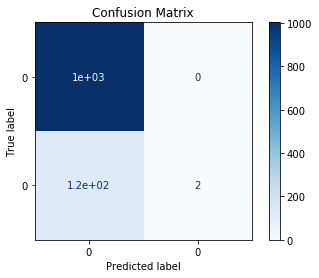

In [61]:
disp = plot_confusion_matrix(lr, X_test, y_test,
                                 display_labels=new_data_model['sars-cov-2_exam_result'],
                                 cmap=plt.cm.Blues)

disp.ax_.set_title("Confusion Matrix")
disp.confusion_matrix
plt.show()

In [62]:
confusion = confusion_matrix(y_test, predicted)
confusion

array([[1003,    0],
       [ 124,    2]], dtype=int64)

In [63]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [64]:
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

"Sensitivity: {} | Specifictity: {}".format(sensitivity, specificity)

'Sensitivity: 0.015873015873015872 | Specifictity: 1.0'

## Conclusion

### Here we try 2 approaches. First, selecting the features with less missing values. Second, selecting the features with the highest correlation with the target. 

### We fill the missing values with the features median and tested 4 different classifiers using k-fold cross-validation, with k = 10.

### Both approaches achieve similar results, therefore the main issue are in the features. The number of missing values are high, making it necessary to try different strategies.

### Despite the feature problems, the classifiers achieved good specificity values